Wilson-Devinney Style Meshing
============================

**NOTE**: Wilson-Devinney Style meshing requires developer mode in PHOEBE and is meant to be used for testing, not used for science.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

phoebe.devel_on() # CURRENTLY REQUIRED FOR WD-STYLE MESHING (WHICH IS EXPERIMENTAL)

logger = phoebe.logger()

b = phoebe.default_binary()

Changing Meshing Options
--------------------------------

Next we need to add compute options and change the mesh_style for all stars from 'marching' to 'wd'

In [3]:
b.set_value_all('mesh_method', 'wd')
b.set_value_all('eclipse_method', 'graham')

Mon, 15 Oct 2018 17:14 PARAMETERS   WARNING all (or none) components must use mesh_method='wd'.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


Adding Datasets
---------------------

Next let's add a mesh dataset so that we can plot our Wilson-Devinney style meshes

In [4]:
b.add_dataset('mesh', times=np.linspace(0,10,6), dataset='mesh01', columns=['visibilities'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

Running Compute
------------------

In [5]:
b.run_compute(irrad_method='none')

<ParameterSet: 38 parameters | components: primary, secondary>

Plotting
---------------------

In [15]:
afig, mplfig = b['mesh01@model'].plot(time=0.5, x='us', y='vs',
                                      show=True)

Now let's zoom in so we can see the layout of the triangles.  Note that Wilson-Devinney uses trapezoids, but since PHOEBE uses triangles, we take each of the trapezoids and split it into two triangles.

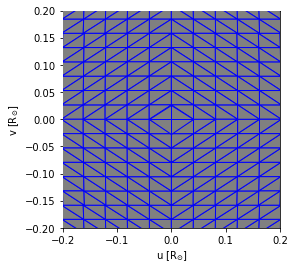

In [7]:
afig, mplfig = b['primary@mesh01@model'].plot(time=0.0,  x='us', y='vs',
                                              ec='blue', fc='gray', 
                                              xlim=(-0.2,0.2), ylim=(-0.2,0.2), 
                                              show=True)

And now looking down from above.  Here you can see the gaps between the surface elements (and you can also see some of the subdivision that's taking place along the limb).

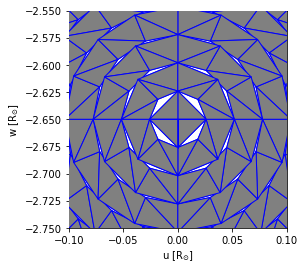

In [11]:
afig, mplfig = b['primary@mesh01@model'].plot(time=0.0, x='us', y='ws', 
                                              ec='blue', fc='gray', 
                                              xlim=(-0.1,0.1), ylim=(-2.75,-2.55), 
                                              show=True)

And see which elements are visible at the current time.  This defaults to use the 'RdYlGn' colormap which will make visible elements green, partially hidden elements yellow, and hidden elements red.  Note that the observer is in the positive w-direction.

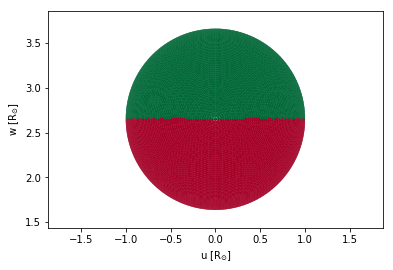

In [9]:
afig, mplfig = b['secondary@mesh01@model'].plot(time=0.0, x='us', y='ws', 
                                                ec='None', fc='visibilities',
                                                show=True)